<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0602/0602_08_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_PCA(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## PCA

In [2]:
# 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

유방암 데이터는 30개의 feature를 가지고 있다. 

In [3]:
print(cancer.data.shape)

(569, 30)


In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터 전처리

- 차원 축소를 하기에 앞서 Xfeature들 간의 단위 차이가 조정되어야 함 -> scaling

In [5]:
# 평균0, 분산 1을 갖도록 X_feature scaling: 여러 Scaler들 중 하나
from sklearn.preprocessing import StandardScaler 
# 스케일링이 선행되어야 PCA 가능, 보통은 StandardScaler(표준편차) 사용
scaler = StandardScaler()
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

### 모델링

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #주성분 개수 2개
# n_components : 주성분 개수 가 제일 중요, SVD로 푼다

#pca 모델 학습: X_data만 필요
pca.fit(data) # data = scale한 데이터

#학습된 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(data)
print("원본 데이터의 형태: ", str(data.shape))
print("축소된 데이터의 형태: ", str(data_pca.shape))

원본 데이터의 형태:  (569, 30)
축소된 데이터의 형태:  (569, 2)


In [9]:
data.shape

(569, 30)

In [10]:
pca.transform(data) 
# 2차원으로 줄인 것을 확인 가능( = 주성분이 제일 큰 것 2개를 설정해서 2개가 나옴)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [7]:
print('PCA Component별 변동성:', pca.explained_variance_ratio_)
# explained_variance_ratio_ : 데이터의 분산이 주성분에 얼마나 확보가 되어 있는가
# 첫번째는 주성분의 0.44 , 두번째는 주성분의 0.18이 들어있다

PCA Component별 변동성: [0.44272026 0.18971182]


<Figure size 500x500 with 0 Axes>

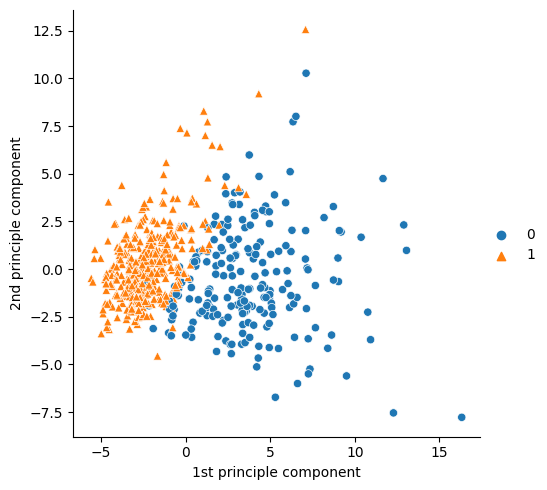

In [8]:
import seaborn as sns 
plt.figure(figsize = (5,5))
markers = {0: "o", 1: "^"}
sns.relplot(x = data_pca[:, 0], y = data_pca[:, 1], style = cancer.target, hue = cancer.target, kind ='scatter', markers = markers)
# x = data_pca[:, 0] : 주성분의 1번째 값, y = data_pca[:, 1] : 주성분의 2번째 값

plt.xlabel('1st principle component')
plt.ylabel('2nd principle component')
plt.show()
# 시각화가 전혀 되지 않던 데이터를 시각화할 수 있도록 만들어줌

주성분은 원본 feature들의 조합으로 표현할 수 있다.
그렇다면 어떻게 조합되었을까?

In [ ]:
print(pca.components_[0], pca.components_[1], sep = "\n\n")
# components_ : 주성분

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


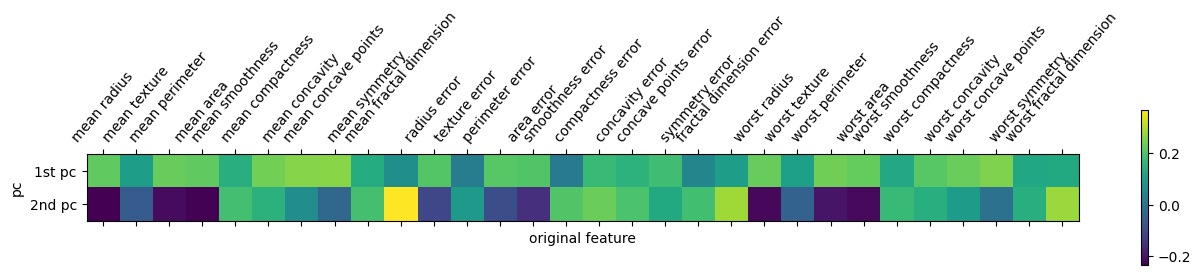

In [11]:
#w 주성분1과 주성분2가 각각 어느정도 데이터를 반영하고 있는가 >> 시각화
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation =50) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()
# 첫번째는 데이터를 고르게, 두번째는 값이 차이가 나게 나옴
# 선형결합을 해서 이런 숫자가 나왔다는 것은 알 수 있으나 이렇게 압축된 주성분이 뭘 의미하는지 알 수 없다
# 1, 2 주성분이 뭘 의미 하는 지는 모름/ 1 주성분은 이렇게 만들어졌다는 것 까지만 알 수 있다
# 고유값(pca모델명.components_ 하면 나옴)을 보고 결정하든가 주성분의 숫자를 바꿔가면서 돌리면 된다
# 밑에 그래프는 X와 곱한 결과라서 X값에 따라 주성분 그래프 값이 다르게 나타난

In [12]:
# 차원 축소를 한 데이터로 랜덤포레스트 돌려보자
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_pca, cancer.target, scoring='accuracy', cv=3 )

print("PCA를 한 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))
# 압축을 해서 정보 손실이 좀 있기 때문에 원본 데이터로 훈련한 것 보다 정확도는 떨어짐

PCA를 한 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.92105263 0.94210526 0.93121693]
평균 정확도:0.9315


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_scaled, cancer.target, scoring='accuracy', cv=3 )

print("PCA를 하지 않은 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))
# 결과는 원래 데이터가 더 잘나옴

PCA를 하지 않은 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.94210526 0.97368421 0.96296296]
평균 정확도:0.9596


### PCA : 주성분 6개

In [14]:
pca = PCA(n_components = 6)
data_pca_6 = pca.fit_transform(cancer.data)

In [15]:
pc_comp = pca.components_
pc_comp.shape

(6, 30)

In [16]:
for pc in pca.explained_variance_ratio_: 
    print('PCA Component별 변동성: {:.4f}'.format(pc))

PCA Component별 변동성: 0.9820
PCA Component별 변동성: 0.0162
PCA Component별 변동성: 0.0016
PCA Component별 변동성: 0.0001
PCA Component별 변동성: 0.0001
PCA Component별 변동성: 0.0000


In [17]:
sum(pca.explained_variance_ratio_)

0.9999945253758252

<Figure size 2000x2000 with 0 Axes>

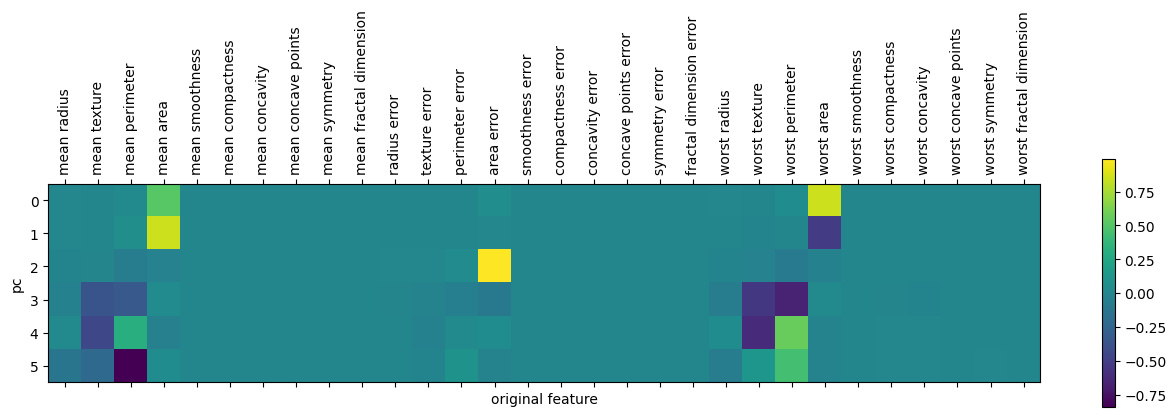

In [18]:
plt.figure(figsize = (20,20))
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.yticks(range(pc_comp.shape[0]))

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()
# 청록색은 0에 가까운 값들

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_pca_6, cancer.target, scoring='accuracy', cv=3 )

print("PCA를 한 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 한 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.92631579 0.96842105 0.94708995]
평균 정확도:0.9473


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_scaled, cancer.target, scoring='accuracy', cv=3 )

print("PCA를 하지 않은 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 하지 않은 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.94210526 0.97368421 0.96296296]
평균 정확도:0.9596


### PCA : 주성분 30개

In [20]:
pca = PCA(n_components = 30)
data_pca_30 = pca.fit_transform(cancer.data)

In [21]:
# 주성분 30개 (원래 데이터 feature 개수도 30개)
pc_comp = pca.components_
pc_comp.shape

(30, 30)

In [22]:
for pc in pca.explained_variance_ratio_: 
    print('PCA Component별 변동성: {:.4f}'.format(pc))
    # 첫번째 변동성에 거의 모든 데이터가 들어감

PCA Component별 변동성: 0.9820
PCA Component별 변동성: 0.0162
PCA Component별 변동성: 0.0016
PCA Component별 변동성: 0.0001
PCA Component별 변동성: 0.0001
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000
PCA Component별 변동성: 0.0000


<Figure size 2000x2000 with 0 Axes>

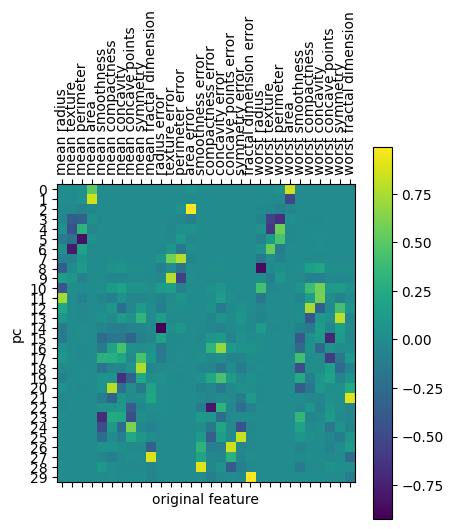

In [23]:
plt.figure(figsize = (20,20))
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.yticks(range(30))

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_pca_30, cancer.target, scoring='accuracy', cv=3 )

print("PCA를 한 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 한 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.91578947 0.95789474 0.95238095]
평균 정확도:0.9420


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_scaled, cancer.target, scoring='accuracy', cv=3 )
print("PCA를 하지 않은 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 하지 않은 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.94210526 0.97368421 0.96296296]
평균 정확도:0.9596


## 실습

In [25]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
# (150, 4)

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 데이터 전처리

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris.data)
train = scaler.transform(iris.data)
print('원본:',str(iris.data.shape))
print('스케일링:',str(train.shape))

원본: (150, 4)
스케일링: (150, 4)


### PCA 실행 - 주성분 2개

In [58]:
from sklearn.decomposition import PCA
PCA = PCA(n_components= 2)
PCA.fit(train)
data_PCA = PCA.transform(train)
print("원본 데이터의 형태: ", str(train.shape))
print("축소된 데이터의 형태: ", str(data_PCA.shape))


원본 데이터의 형태:  (150, 4)
축소된 데이터의 형태:  (150, 2)


In [40]:
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [74]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)

num_components = list(range(1, 5))	

for i in num_components:
    model = PCA(n_components=i)
    data_PCA = model.fit_transform(train)

    scores = cross_val_score(rcf, data_PCA, iris.target, scoring='accuracy', cv=3 )

    print("PCA를 한 데이터의 결과")
    print(f'CV={i} 인 경우의 개별 Fold세트별 정확도:',scores)
    print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 한 데이터의 결과
CV=1 인 경우의 개별 Fold세트별 정확도: [0.9  0.94 0.9 ]
평균 정확도:0.9133
PCA를 한 데이터의 결과
CV=2 인 경우의 개별 Fold세트별 정확도: [0.88 0.88 0.88]
평균 정확도:0.8800
PCA를 한 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.94 0.94 0.94]
평균 정확도:0.9400
PCA를 한 데이터의 결과
CV=4 인 경우의 개별 Fold세트별 정확도: [0.98 0.9  0.96]
평균 정확도:0.9467


### 결과 시각화

x축에는 주성분1, y축에는 주성분2, 데이터의 색은 붓꽃의 종(species)가 되도록 시각화해보세요. 

In [ ]:
# 원본의 target과 X데이터 프레임 merge

target = pd.DataFrame(iris.target, columns=['type'])
target['type'] = target['type'].apply(lambda x: iris.target_names[x])
merged = pd.concat([result, target], axis=1)

<Axes: >

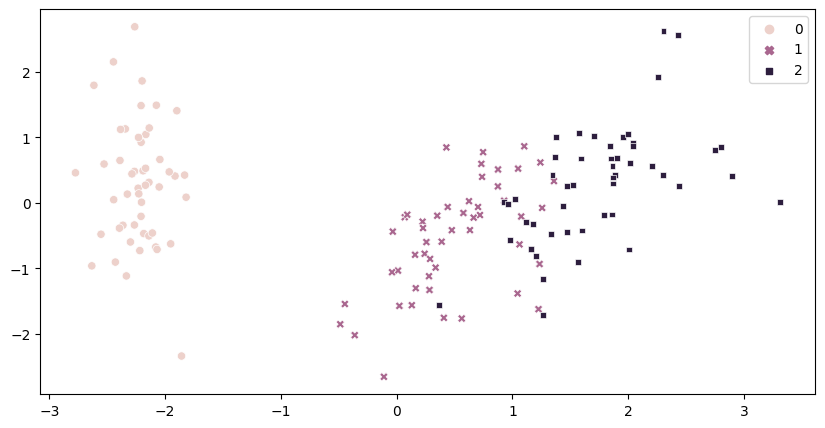

In [75]:
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns


# 시각화
plt.figure(figsize=(10, 5))
sns.set_palette(sns.color_palette("muted"))
sns.scatterplot(x = data_PCA[:, 0], y = data_PCA[:, 1], style = iris.target, hue = iris.target)
sns.scatterplot()


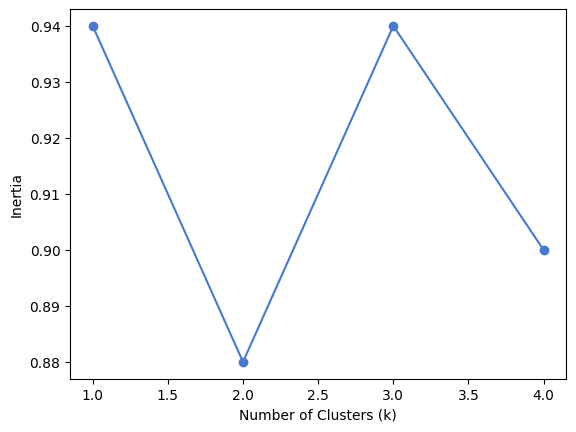

In [85]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

num_components = list(range(1, 5))	
score = []

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
# 랜덤 포레스트 모델

for i in num_components:
    model = PCA(n_components=i)    
    data_PCA = model.fit_transform(train)
    scores = cross_val_score(rcf, data_PCA, iris.target, scoring='accuracy', cv=3 ) 
    # rcf, data_PCA, iris.target의 정확도 측정
    score.append(scores[1])
    # data_PCA의 정확도 확인

# K에 따른 score의 변화를 시각화합니다
plt.plot(num_components, score, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

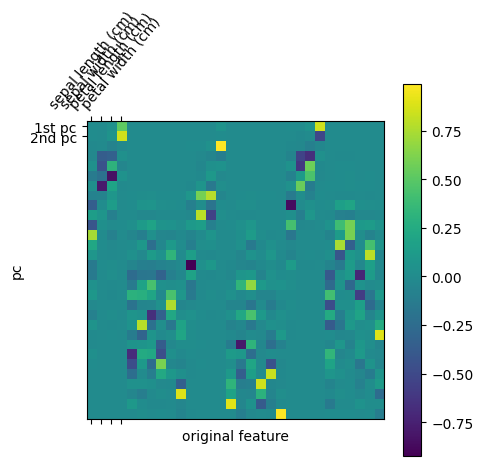

In [47]:
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation =50) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()